<a href="https://colab.research.google.com/github/riteeshinfo/K-neras-project-You-tube-ads-/blob/main/k_nears.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing modules


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing


In [3]:
dataset=pd.read_csv("Social_Network_Ads.CSV") 
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

# standard scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X,Y)

StandardScaler()

# train and test spliting module

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size =0.25,random_state=0)

In [7]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [8]:
print(Y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## K-nears training set 

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

# predicting the module

In [10]:
print(classifier.predict([[50,90000]]))

[1]


In [11]:
Y_pred = classifier.predict(X_train)


In [25]:
print(Y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1]


# Making the confusion metrics

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_train, Y_pred)
print(cm)
accuracy_score(Y_train, Y_pred)

[[173  16]
 [ 21  90]]


0.8766666666666667

# visualsilation of the module

ERROR RATE OF THE MODULE

In [13]:
error_rate = []
for i in range(1,29):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,Y_train)
  pred_i=classifier.predict(X_test)
  error_rate.append(np.mean(pred_i != Y_test))

In [14]:
print(error_rate)

[0.16, 0.23, 0.22, 0.19, 0.17, 0.16, 0.19, 0.16, 0.16, 0.18, 0.11, 0.16, 0.16, 0.16, 0.14, 0.15, 0.15, 0.16, 0.13, 0.16, 0.15, 0.17, 0.16, 0.16, 0.17, 0.17, 0.21, 0.17]


Text(0.5, 0, 'knears')

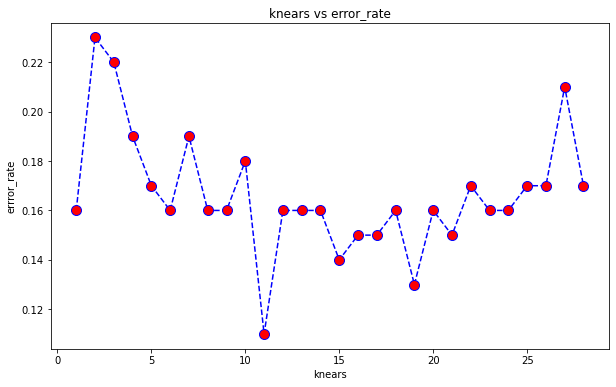

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,29),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("knears vs error_rate")
plt.ylabel("errror_rate")
plt.xlabel("knears")

# classification of k nears


In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()